# Natural Language Processing Project

## Task: Classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

## Data:
[Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

Stars:  The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is 
        better.) It is the rating of the business by the person who wrote the review.

Cool:   The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0  
        "cool" votes, and there is no limit to how many "cool" votes a review can receive. It is a rating of the review itself, 
        not a rating of the business.

Useful & Funny:  The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
#Create a new column called "text length" which is the number of words in the text column
yelp['text length'] = yelp['text'].apply(len)

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

In [9]:
#set style
sns.set_style('white')

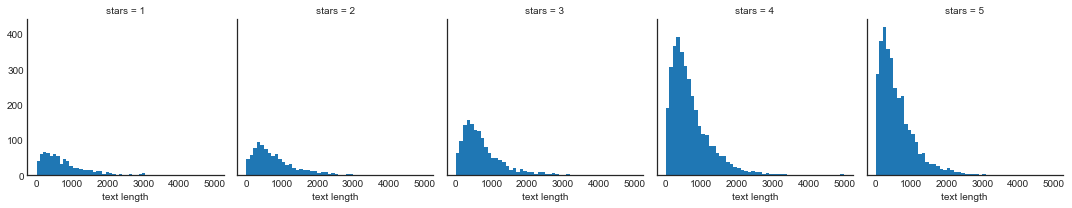

In [10]:
#grid of 5 histograms of text length based off of the star ratings
g = sns.FacetGrid(yelp, col="stars")
g = g.map(plt.hist, "text length", bins=50)

### Analysis:
    
All have similar distributions, right tailed.  However, 4 and 5 stars have significantly more messages than 1,2, and 3 stars

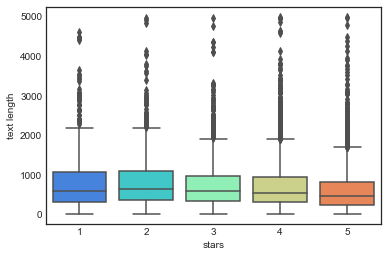

In [11]:
#boxplot of text length for each star category
sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')

### Analysis:
    
Text length may not be a useful feature as there are many outliers at all stars.

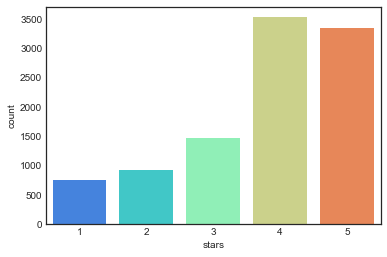

In [12]:
#countplot of the number of occurrences for each type of star rating
sns.countplot(x='stars', data=yelp, palette='rainbow')

### Analysis:

This shows that there are significantly more messages in the 4 or 5 star rating than 1, 2, or 3.

In [13]:
#Use groupby to get the mean values of the numerical columns
stars = yelp.groupby("stars").mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [14]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


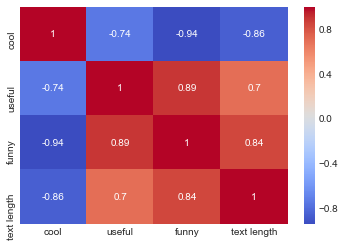

In [15]:
#create a heatmap based off that .corr() dataframe
sns.heatmap(stars.corr(), cmap='coolwarm', annot=True)

### Analysis:

Funny is highly correlated with useful and funny is highly correlated with text length.  Also, there is a negative correlation between text length, funny, and useful and cool.

## NLP Classification Task

In [16]:
#dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [17]:
yelp_class[yelp_class['stars']==3]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length


In [18]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [19]:
#two objects X and y
X = yelp_class['text']
y = yelp_class['stars']

In [20]:
#Import CountVectorizer and create a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [21]:
#fit the CountVectorizer object with X (the 'text' column)
X = cv.fit_transform(X)

## Train Test Split

In [67]:
#import
from sklearn.model_selection import train_test_split

#train_test_split to split up the data
msg_train, msg_test, stars_train, stars_test = \
train_test_split(X, y, test_size=0.3,  random_state=101)

## Training a Model

In [23]:
#Import MultinomialNB and create an instance of the estimator and call is nb
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [24]:
#fit nb using the training data
nb.fit(msg_train, stars_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations

In [25]:
#Use the predict method off of nb to predict labels from X_test
predictions = nb.predict(msg_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
#Create a confusion matrix and classification report using these predictions and y_test
print(confusion_matrix(stars_test,predictions))
print('\n')
print(classification_report(stars_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



## Using the Pipeline with TF-IDF

In [28]:
#Import
from sklearn.feature_extraction.text import TfidfTransformer

In [29]:
#Import Pipeline from sklearn
from sklearn.pipeline import Pipeline

In [30]:
#pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline

### Train Test Split

In [31]:
#two objects X and y
X = yelp_class['text']
y = yelp_class['stars']

#train_test_split to split up the data
msg_train, msg_test, stars_train, stars_test = train_test_split(X, y, test_size=0.3,  random_state=101)

In [32]:
#fit the pipeline to the training data
pipeline.fit(msg_train, stars_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

In [33]:
#use the pipeline to predict from the X_test
predictions_1 = pipeline.predict(msg_test)

In [34]:
#classification report and confusion matrix
print(confusion_matrix(stars_test,predictions_1))
print('\n')
print(classification_report(stars_test,predictions_1))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Y\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Using the Pipeline with a Text Processor & TF-IDF

In [35]:
#two objects X and y
X = yelp_class['text']
y = yelp_class['stars']

In [36]:
import string
from nltk.corpus import stopwords

In [37]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

### Train Test Split

In [40]:
#train_test_split to split up the data
text_train, text_test, stars_train, stars_test = \
train_test_split(yelp_class['text'], yelp_class['stars'], test_size=0.3, random_state=101)

print(len(text_train), len(text_test), len(text_train) + len(text_test))

2860 1226 4086


In [42]:
#pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()
pipeline_1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [43]:
#fit the pipeline to the training data
pipeline_1.fit(text_train,stars_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001BC4322F378>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

In [44]:
#use the pipeline to predict from the X_test
predictions_2 = pipeline_1.predict(text_test)

In [45]:
print(predictions_2)

[5 5 5 ..., 5 5 5]


In [46]:
print(confusion_matrix(stars_test,predictions_2))
print('\n')
print(classification_report(stars_test,predictions_2))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Y\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Using the Pipeline with a Text Processor without term frequency-inverse document frequency

In [47]:
#two objects X and y
X = yelp_class['text']
y = yelp_class['stars']

In [48]:
#train_test_split to split up the data
text_train, text_test, stars_train, stars_test = \
train_test_split(yelp_class['text'], yelp_class['stars'], test_size=0.3, random_state=101)

print(len(text_train), len(text_test), len(text_train) + len(text_test))

2860 1226 4086


In [49]:
#pipeline with the following steps:CountVectorizer(),MultinomialNB()
pipeline_2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [50]:
#fit the pipeline to the training data
pipeline_2.fit(text_train,stars_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001BC4322F378>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

In [51]:
predictions_3 = pipeline_2.predict(text_test)

In [68]:
print('CASE 4')
print('\n')
print('Using the Pipeline with a Text Processor without TF-IDF:')
print('\n')
print(confusion_matrix(stars_test,predictions_3))
print('\n')
print(classification_report(stars_test,predictions_3))

CASE 4


Using the Pipeline with a Text Processor without TF-IDF:


[[143  85]
 [ 11 987]]


             precision    recall  f1-score   support

          1       0.93      0.63      0.75       228
          5       0.92      0.99      0.95       998

avg / total       0.92      0.92      0.92      1226



# Results:

The overall best results occurred when text processing and TF-IDF were not used.(see CASE 1)  The next best results occurred when when text processing was used and TF-IDF was not used.(see CASE 4)  These results were very similar to the results from CASE 1.  When TF-IDF was used, case 2 and 3, the following error was received: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

In [63]:
print('CASE 1')
print('\n')
print('Using the Pipeline without the Text Processor & without TF-IDF:')
print('\n')
print(confusion_matrix(stars_test,predictions))
print('\n')
print(classification_report(stars_test,predictions))

CASE 1


Using the Pipeline without the Text Processor & without TF-IDF:


[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [64]:
print('CASE 2')
print('\n')
print('Using the Pipeline without a Text Processor with TF-IDF:')
print('\n')
print(confusion_matrix(stars_test,predictions_1))
print('\n')
print(classification_report(stars_test,predictions_1))

CASE 2


Using the Pipeline without a Text Processor with TF-IDF:


[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Y\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [65]:
print('CASE 3')
print('\n')
print('Using the Pipeline with a Text Processor with TF-IDF:')
print('\n')
print(confusion_matrix(stars_test,predictions_2))
print('\n')
print(classification_report(stars_test,predictions_2))

CASE 3


Using the Pipeline with a Text Processor with TF-IDF:


[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Y\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [66]:
print('CASE 4')
print('\n')
print('Using the Pipeline with a Text Processor without TF-IDF:')
print('\n')
print(confusion_matrix(stars_test,predictions_3))
print('\n')
print(classification_report(stars_test,predictions_3))

CASE 4


Using the Pipeline with a Text Processor without TF-IDF:


[[143  85]
 [ 11 987]]


             precision    recall  f1-score   support

          1       0.93      0.63      0.75       228
          5       0.92      0.99      0.95       998

avg / total       0.92      0.92      0.92      1226

